In [1]:
# Imports, nothing to see here
import random
import math
import sys,os

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
sys.path.insert(0, os.path.abspath('..'))
from spreadsheet.cell import Cell
from spreadsheet.arraySpreadsheet import ArraySpreadsheet
from spreadsheet.linkedlistSpreadsheet import LinkedListSpreadsheet
from spreadsheet.csrSpreadsheet import CSRSpreadsheet
from spreadsheet.baseSpreadsheet import BaseSpreadsheet
from time import perf_counter

In [2]:
def create_random_cells(num_cells: int, max_col:int, max_row:int) -> list[Cell]:
    """
    num_cells: number of cells you want
    max_col: maximum number of columns you want in your spreadsheet
    max_row: maximum number of rows you want in your spreadsheet
    """
    lCells = []
    lCells.append(Cell((max_row-1),(max_col-1),round(random.uniform(0.1,9.9), ndigits=2)))
    for _ in range(num_cells):
        row = random.randint(0, max_col-1)
        col = random.randint(0, max_row-1)
        val = round(random.uniform(0.1,9.9), ndigits=1)
        lCells.append(Cell(row, col, val))
    return lCells

def create_density(density:float, max_cols:int, max_rows:int):
    """
    percentage is a float of the percent of non-None cells you want, e.g. 0.1 represents 10% cells
    with non-None values.
    """
    ret = []
    ret.append(Cell((max_rows-1),(max_cols-1),(round(random.uniform(0.1,9.9), ndigits=2))))
    cells_to_make = max_rows*max_cols*density-1
    while cells_to_make > 0:
        row = random.randint(0, max_cols-1)
        col = random.randint(0, max_rows-1)
        val = round(random.uniform(0.1,9.9), ndigits=2)
        ret.append(Cell(row, col,val))
        cells_to_make -=1
    return ret

def different_densities(cells_to_generate:int):
    low = random.uniform(0.01,0.3)
    med = random.uniform(0.31,0.60)
    high = random.uniform(0.61,0.99)
    densities = [low, med, high ]
    lCells_list = []
    for x in densities:
        lCells_list.append(create_density(cells_to_generate,x))
    return lCells_list

def write_to_file(cells_to_generate:int, max_col:int, max_row:int):
    file = open("sample_data.txt","w")
    file.write(create_random_cells(cells_to_generate, max_col, max_row))
    file.close()

def display_array(array: ArraySpreadsheet):
    arr =array.array 
    for x in arr:
        for y in x:
            if(y.val == None):
                print("("+str(y.row),str(y.col)+" N)", end = " ")
            else:
                print(y, end = " ")
        print() #newline
    print("finished")

def get_lCells()->list[Cell]:
    """
    basically read from the file and create a list of cells from the data from the file
    """
    try:
        lcells = []
        dataFile = open("sample_data.txt", 'r')
        for line in dataFile:
            values = line.split()
            currRow = int(values[0])
            currCol = int(values[1])
            currVal = float(values[2])
            currCell = Cell(currRow, currCol, currVal)
            # each line contains a cell
            lcells.append(currCell)
        dataFile.close()
        return lcells
    except FileNotFoundError as e:
        print("Data file doesn't exist.")

def set_up_cells(cells_to_generate, max_col, max_row):
    write_to_file(cells_to_generate, max_col, max_row)
    return get_lCells()

def test_buildSpreadSheet(spreadSheet:BaseSpreadsheet,lCells:list[Cell]):
    start_time = perf_counter()
    spreadSheet.buildSpreadsheet(lCells)
    end_time = perf_counter()
    return end_time-start_time

def test_entries(spreadSheet:BaseSpreadsheet):
    start_time = perf_counter()
    spreadSheet.entries()
    end_time = perf_counter()
    return end_time-start_time

def test_update(spreadSheet:BaseSpreadsheet, rowIndex: int, colIndex:int, val:float):
    start_time = perf_counter()
    spreadSheet.update(rowIndex, colIndex,val)
    end_time = perf_counter()
    return end_time-start_time

def test_append_row(spreadSheet:BaseSpreadsheet):
    start_time = perf_counter()
    spreadSheet.appendRow()
    end_time = perf_counter()
    return end_time-start_time

def test_append_col(spreadSheet:BaseSpreadsheet):
    start_time = perf_counter()
    spreadSheet.appendCol()
    end_time = perf_counter()
    return end_time-start_time

def test_insert_row(spreadSheet:BaseSpreadsheet, rowIndex:int):
    start_time = perf_counter()
    spreadSheet.insertRow(rowIndex)
    end_time = perf_counter()
    return end_time-start_time

def test_insert_col(spreadsheet:BaseSpreadsheet, colIndex:int):
    start_time = perf_counter()
    spreadsheet.insertCol(colIndex)
    end_time = perf_counter()
    return end_time-start_time

def test_find(spreadSheet:BaseSpreadsheet, value:float):
    start_time = perf_counter()
    spreadSheet.find(value)
    end_time = perf_counter()
    return end_time-start_time



def test_row_num(spreadsheet:BaseSpreadsheet):
    start_time = perf_counter()
    spreadsheet.rowNum()
    end_time = perf_counter()
    return end_time-start_time

def test_col_num(spreadsheet:BaseSpreadsheet):
    start_time = perf_counter()
    spreadsheet.colNum()
    end_time = perf_counter()
    return end_time-start_time

In [3]:
#to test:
#3 different sizes -> 3 different  density
# 0.1, 0.5, 0.9
# (50,50) (500,500) (1000,1000)
#for all 3 of the abstract datat types


In [4]:
#generate datasets
#number of cells in each dataset:
#size/density:| 0.1     | 0.5     | 0.9
#50x50        | 250     | 1,250   |2,250
#100x100      | 1,000   | 5,000   |9,000
#500x500    | 10,000  | 500,000   |225,000
datasets = []

for x in [0.1,0.5,0.9]:
    for y in [50,100,1000]:
        datasets.append(create_density(x,y,y))

In [5]:
#create small arrays
small_spreadsheets = [ArraySpreadsheet(), ArraySpreadsheet(), ArraySpreadsheet()]
small_spreadsheets_tests =[]
#run the tests
counter = 0
for x in range(0,datasets.__len__(), 3):
    small_spreadsheets_tests.append(test_buildSpreadSheet(small_spreadsheets[counter],datasets[x])*1000)
    small_spreadsheets_tests.append(test_append_col(small_spreadsheets[counter])*1000)
    small_spreadsheets_tests.append(test_append_row(small_spreadsheets[counter])*1000)
    small_spreadsheets_tests.append(test_insert_col(small_spreadsheets[counter],x)*1000)
    small_spreadsheets_tests.append(test_insert_row(small_spreadsheets[counter],x)*1000)
    small_spreadsheets_tests.append(test_col_num(small_spreadsheets[counter])*1000)
    small_spreadsheets_tests.append(test_row_num(small_spreadsheets[counter])*1000)
    small_spreadsheets_tests.append(test_entries(small_spreadsheets[counter])*1000)
    small_spreadsheets_tests.append(test_update(small_spreadsheets[counter],x,x,x)*1000)
    small_spreadsheets_tests.append(test_find(small_spreadsheets[counter],x)*1000)
    counter +=1
#create a pandas data frame to make it all look nice and maybe for graph generation laters
small_df = pd.DataFrame()
small_df["low_density"] = small_spreadsheets_tests[0:10]
small_df["med_density"]= small_spreadsheets_tests[10:20]
small_df["high_density"] = small_spreadsheets_tests[20:30]

small_df.index = ["build_spreadsheet","append_col", "append_row", "insert_col", "insert_row", "col_num", "row_num","entries", "update","find"]
display(small_df)

,low_density,med_density,high_density
build_spreadsheet,0.930250,1.607667,2.023292
append_col,0.016250,0.058000,0.013250
append_row,0.016291,0.017750,0.018125
insert_col,0.244625,0.241750,0.232292
insert_row,0.300500,0.157166,0.207916
col_num,0.001417,0.000209,0.000292
row_num,0.000250,0.000166,0.000166
entries,0.566750,3.613000,5.074334
update,0.001333,0.002959,0.003417
find,0.191750,0.260334,0.279917


In [6]:
#create medium arrays
med_spreadsheets = [ArraySpreadsheet(), ArraySpreadsheet(), ArraySpreadsheet()]
med_spreadsheets_tests =[]
#run the tests
counter = 0
for x in range(1,datasets.__len__(), 3):
    med_spreadsheets_tests.append(test_buildSpreadSheet(med_spreadsheets[counter],datasets[x])*1000)
    med_spreadsheets_tests.append(test_append_col(med_spreadsheets[counter])*1000)
    med_spreadsheets_tests.append(test_append_row(med_spreadsheets[counter])*1000)
    med_spreadsheets_tests.append(test_insert_col(med_spreadsheets[counter],x)*1000)
    med_spreadsheets_tests.append(test_insert_row(med_spreadsheets[counter],x)*1000)
    med_spreadsheets_tests.append(test_col_num(med_spreadsheets[counter])*1000)
    med_spreadsheets_tests.append(test_row_num(med_spreadsheets[counter])*1000)
    med_spreadsheets_tests.append(test_entries(med_spreadsheets[counter])*1000)
    med_spreadsheets_tests.append(test_update(med_spreadsheets[counter],x,x,x)*1000)
    med_spreadsheets_tests.append(test_find(med_spreadsheets[counter],x)*1000)
    counter +=1
#create a pandas data frame to make it all look nice and maybe for graph generation laters
med_df = pd.DataFrame()
med_df["low_density"] = med_spreadsheets_tests[0:10]
med_df["med_density"]= med_spreadsheets_tests[10:20]
med_df["high_density"] = med_spreadsheets_tests[20:30]

med_df.index = ["build_spreadsheet","append_col", "append_row", "insert_col", "insert_row", "col_num", "row_num","entries", "update","find"]
display(med_df)

,low_density,med_density,high_density
build_spreadsheet,3.600375,6.583292,7.991459
append_col,0.059416,0.032209,0.220000
append_row,0.027833,0.284917,0.030417
insert_col,0.843833,0.877958,0.842792
insert_row,0.559375,0.560833,0.564750
col_num,0.000250,0.000208,0.000208
row_num,0.000166,0.000166,0.000167
entries,2.600667,9.268417,13.636959
update,0.001792,0.002208,0.001209
find,0.754792,0.826209,0.817583


In [7]:
#create large arrays
large_spreadsheets = [ArraySpreadsheet(), ArraySpreadsheet(), ArraySpreadsheet()]
large_spreadsheets_tests =[]
#run the tests
counter = 0
for x in range(2,datasets.__len__(), 3):
    large_spreadsheets_tests.append(test_buildSpreadSheet(large_spreadsheets[counter],datasets[x])*1000)
    large_spreadsheets_tests.append(test_append_col(large_spreadsheets[counter])*1000)
    large_spreadsheets_tests.append(test_append_row(large_spreadsheets[counter])*1000)
    large_spreadsheets_tests.append(test_insert_col(large_spreadsheets[counter],x)*1000)
    large_spreadsheets_tests.append(test_insert_row(large_spreadsheets[counter],x)*1000)
    large_spreadsheets_tests.append(test_col_num(large_spreadsheets[counter])*1000)
    large_spreadsheets_tests.append(test_row_num(large_spreadsheets[counter])*1000)
    large_spreadsheets_tests.append(test_entries(large_spreadsheets[counter])*1000)
    large_spreadsheets_tests.append(test_update(large_spreadsheets[counter],x,x,x)*1000)
    large_spreadsheets_tests.append(test_find(large_spreadsheets[counter],x)*1000)
    counter +=1
#create a pandas data frame to make it all look nice and maybe for graph generation laters
large_df = pd.DataFrame()
large_df["low_density"] = large_spreadsheets_tests[0:10]
large_df["med_density"]= large_spreadsheets_tests[10:20]
large_df["high_density"] = large_spreadsheets_tests[20:30]
large_df.index = ["build_spreadsheet","append_col", "append_row", "insert_col", "insert_row", "col_num", "row_num","entries", "update","find"]
display(large_df)

,low_density,med_density,high_density
build_spreadsheet,170.579125,487.513834,521.013833
append_col,4.315250,43.091125,59.110708
append_row,0.173875,58.871959,0.182083
insert_col,29.134167,57.980708,124.824959
insert_row,18.932917,32.455667,36.161542
col_num,0.002083,0.001875,0.001292
row_num,0.000375,0.000666,0.002000
entries,84.030000,367.889750,551.044042
update,0.002292,0.003000,0.004041
find,21.214333,39.569542,53.496125


In [8]:
#create small linkedlist
small_ll_spreadsheets = [LinkedListSpreadsheet(), LinkedListSpreadsheet(), LinkedListSpreadsheet()]
small_ll_spreadsheets_tests =[]
#run the tests
counter = 0
for x in range(0,datasets.__len__(), 3):
    small_ll_spreadsheets_tests.append(test_buildSpreadSheet(small_ll_spreadsheets[counter],datasets[x])*1000)
    small_ll_spreadsheets_tests.append(test_append_col(small_ll_spreadsheets[counter])*1000)
    small_ll_spreadsheets_tests.append(test_append_row(small_ll_spreadsheets[counter])*1000)
    small_ll_spreadsheets_tests.append(test_insert_col(small_ll_spreadsheets[counter],x)*1000)
    small_ll_spreadsheets_tests.append(test_insert_row(small_ll_spreadsheets[counter],x)*1000)
    small_ll_spreadsheets_tests.append(test_col_num(small_ll_spreadsheets[counter])*1000)
    small_ll_spreadsheets_tests.append(test_row_num(small_ll_spreadsheets[counter])*1000)
    small_ll_spreadsheets_tests.append(test_entries(small_ll_spreadsheets[counter])*1000)
    small_ll_spreadsheets_tests.append(test_update(small_ll_spreadsheets[counter],x,x,x)*1000)
    small_ll_spreadsheets_tests.append(test_find(small_ll_spreadsheets[counter],x)*1000)
    counter +=1
#create a pandas data frame to make it all look nice and maybe for graph generation laters
small_ll_df = pd.DataFrame()
small_ll_df["low_density"] = small_ll_spreadsheets_tests[0:10]
small_ll_df["med_density"]= small_ll_spreadsheets_tests[10:20]
small_ll_df["high_density"] = small_ll_spreadsheets_tests[20:30]

small_ll_df.index = ["build_spreadsheet","append_col", "append_row", "insert_col", "insert_row", "col_num", "row_num","entries", "update","find"]
display(small_ll_df)

,low_density,med_density,high_density
build_spreadsheet,3.279916,8.166125,14.947250
append_col,0.036709,0.041292,0.049542
append_row,0.035708,0.036500,0.041166
insert_col,2.375875,0.809583,1.137417
insert_row,0.450375,0.408709,0.417792
col_num,0.003708,0.003750,0.004500
row_num,0.003583,0.003542,0.003709
entries,0.315584,0.381375,0.486708
update,0.001625,0.001833,0.002792
find,0.275667,0.324000,0.405042


In [9]:
#create medium linkedlist
med_ll_spreadsheets = [LinkedListSpreadsheet(), LinkedListSpreadsheet(), LinkedListSpreadsheet()]
med_ll_spreadsheets_tests =[]
#run the tests
counter = 0
for x in range(1,datasets.__len__(), 3):
    med_ll_spreadsheets_tests.append(test_buildSpreadSheet(med_ll_spreadsheets[counter],datasets[x])*1000)
    med_ll_spreadsheets_tests.append(test_append_col(med_ll_spreadsheets[counter])*1000)
    med_ll_spreadsheets_tests.append(test_append_row(med_ll_spreadsheets[counter])*1000)
    med_ll_spreadsheets_tests.append(test_insert_col(med_ll_spreadsheets[counter],x)*1000)
    med_ll_spreadsheets_tests.append(test_insert_row(med_ll_spreadsheets[counter],x)*1000)
    med_ll_spreadsheets_tests.append(test_col_num(med_ll_spreadsheets[counter])*1000)
    med_ll_spreadsheets_tests.append(test_row_num(med_ll_spreadsheets[counter])*1000)
    med_ll_spreadsheets_tests.append(test_entries(med_ll_spreadsheets[counter])*1000)
    med_ll_spreadsheets_tests.append(test_update(med_ll_spreadsheets[counter],x,x,x)*1000)
    med_ll_spreadsheets_tests.append(test_find(med_ll_spreadsheets[counter],x)*1000)
    counter +=1
#create a pandas data frame to make it all look nice and maybe for graph generation laters
med_ll_df = pd.DataFrame()
med_ll_df["low_density"] = med_ll_spreadsheets_tests[0:10]
med_ll_df["med_density"]= med_ll_spreadsheets_tests[10:20]
med_ll_df["high_density"] = med_ll_spreadsheets_tests[20:30]

med_ll_df.index = ["build_spreadsheet","append_col", "append_row", "insert_col", "insert_row", "col_num", "row_num","entries", "update","find"]
display(med_ll_df)

,low_density,med_density,high_density
build_spreadsheet,19.354542,345.899333,72.145583
append_col,0.089666,0.079708,0.078958
append_row,0.319083,0.089583,0.091750
insert_col,2.982584,2.857125,2.970500
insert_row,2.467209,1.285042,1.344959
col_num,0.022375,0.006583,0.007125
row_num,0.042000,0.006500,0.006750
entries,1.752500,1.308500,1.549958
update,0.003625,0.001667,0.002125
find,1.452250,1.091541,1.199000


In [10]:
#create large linkedlist
#[small, med, large, small,med,large, small, med, large]
large_ll_spreadsheets = [LinkedListSpreadsheet(), LinkedListSpreadsheet(), LinkedListSpreadsheet()]
large_ll_spreadsheets_tests =[]
#run the tests
counter = 0
for x in range(2,datasets.__len__(), 3):
    large_ll_spreadsheets_tests.append(test_buildSpreadSheet(large_ll_spreadsheets[counter],datasets[x])*1000)
    large_ll_spreadsheets_tests.append(test_append_col(large_ll_spreadsheets[counter])*1000)
    large_ll_spreadsheets_tests.append(test_append_row(large_ll_spreadsheets[counter])*1000)
    large_ll_spreadsheets_tests.append(test_insert_col(large_ll_spreadsheets[counter],x)*1000)
    large_ll_spreadsheets_tests.append(test_insert_row(large_ll_spreadsheets[counter],x)*1000)
    large_ll_spreadsheets_tests.append(test_col_num(large_ll_spreadsheets[counter])*1000)
    large_ll_spreadsheets_tests.append(test_row_num(large_ll_spreadsheets[counter])*1000)
    large_ll_spreadsheets_tests.append(test_entries(large_ll_spreadsheets[counter])*1000)
    large_ll_spreadsheets_tests.append(test_update(large_ll_spreadsheets[counter],x,x,x)*1000)
    large_ll_spreadsheets_tests.append(test_find(large_ll_spreadsheets[counter],x)*1000)
    counter +=1
#create a pandas data frame to make it all look nice and maybe for graph generation laters
large_ll_df = pd.DataFrame()
large_ll_df["low_density"] = large_ll_spreadsheets_tests[0:10]
large_ll_df["med_density"]= large_ll_spreadsheets_tests[10:20]
large_ll_df["high_density"] = large_ll_spreadsheets_tests[20:30]

large_ll_df.index = ["build_spreadsheet","append_col", "append_row", "insert_col", "insert_row", "col_num", "row_num","entries", "update","find"]
display(large_ll_df)

,low_density,med_density,high_density
build_spreadsheet,2561.130500,9611.082083,20829.143250
append_col,0.833917,0.596000,0.667750
append_row,0.442833,0.776417,0.455500
insert_col,75.931583,97.647583,117.493625
insert_row,40.027083,62.671833,83.401208
col_num,0.060000,0.066875,0.089584
row_num,0.155917,0.177500,0.164291
entries,36.836042,66.269375,86.226250
update,0.004958,0.006875,0.012417
find,35.215917,60.650334,80.716334


In [11]:
#create small CSR

small_CSR_spreadsheets = [CSRSpreadsheet(), CSRSpreadsheet(), CSRSpreadsheet()]
small_CSR_spreadsheets_tests =[]
#run the tests
counter = 0
for x in range(0,datasets.__len__(), 3):
    small_CSR_spreadsheets_tests.append(test_buildSpreadSheet(small_CSR_spreadsheets[counter],datasets[x])*1000)
    small_CSR_spreadsheets_tests.append(test_append_col(small_CSR_spreadsheets[counter])*1000)
    small_CSR_spreadsheets_tests.append(test_append_row(small_CSR_spreadsheets[counter])*1000)
    small_CSR_spreadsheets_tests.append(test_insert_col(small_CSR_spreadsheets[counter],x)*1000)
    small_CSR_spreadsheets_tests.append(test_insert_row(small_CSR_spreadsheets[counter],x)*1000)
    small_CSR_spreadsheets_tests.append(test_col_num(small_CSR_spreadsheets[counter])*1000)
    small_CSR_spreadsheets_tests.append(test_row_num(small_CSR_spreadsheets[counter])*1000)
    small_CSR_spreadsheets_tests.append(test_entries(small_CSR_spreadsheets[counter])*1000)
    small_CSR_spreadsheets_tests.append(test_update(small_CSR_spreadsheets[counter],x,x,float(x))*1000)
    small_CSR_spreadsheets_tests.append(test_find(small_CSR_spreadsheets[counter],float(x))*1000)
    counter +=1
#create a pandas data frame to make it all look nice and maybe for graph generation laters
small_CSR_df = pd.DataFrame()
small_CSR_df["low_density"] = small_CSR_spreadsheets_tests[0:10]
small_CSR_df["med_density"]= small_CSR_spreadsheets_tests[10:20]
small_CSR_df["high_density"] = small_CSR_spreadsheets_tests[20:30]

small_CSR_df.index = ["build_spreadsheet","append_col", "append_row", "insert_col", "insert_row", "col_num", "row_num","entries", "update","find"]
display(small_CSR_df)

,low_density,med_density,high_density
build_spreadsheet,0.635084,4.222584,7.047834
append_col,0.000458,0.001084,0.000958
append_row,0.000292,0.000708,0.000500
insert_col,0.007750,0.103375,0.168042
insert_row,0.001375,0.002459,0.001084
col_num,0.000459,0.000958,0.000250
row_num,0.000208,0.000209,0.000208
entries,0.243709,1.060959,2.489875
update,0.031083,0.227084,0.435958
find,0.081208,0.378042,0.728875


In [12]:
#create medium CSR

med_CSR_spreadsheets = [CSRSpreadsheet(), CSRSpreadsheet(), CSRSpreadsheet()]
med_CSR_spreadsheets_tests =[]
#run the tests
counter = 0
for x in range(1,datasets.__len__(), 3):
    med_CSR_spreadsheets_tests.append(test_buildSpreadSheet(med_CSR_spreadsheets[counter],datasets[x])*1000)
    med_CSR_spreadsheets_tests.append(test_append_col(med_CSR_spreadsheets[counter])*1000)
    med_CSR_spreadsheets_tests.append(test_append_row(med_CSR_spreadsheets[counter])*1000)
    med_CSR_spreadsheets_tests.append(test_insert_col(med_CSR_spreadsheets[counter],x)*1000)
    med_CSR_spreadsheets_tests.append(test_insert_row(med_CSR_spreadsheets[counter],x)*1000)
    med_CSR_spreadsheets_tests.append(test_col_num(med_CSR_spreadsheets[counter])*1000)
    med_CSR_spreadsheets_tests.append(test_row_num(med_CSR_spreadsheets[counter])*1000)
    med_CSR_spreadsheets_tests.append(test_entries(med_CSR_spreadsheets[counter])*1000)
    med_CSR_spreadsheets_tests.append(test_update(med_CSR_spreadsheets[counter],x,x,float(x))*1000)
    med_CSR_spreadsheets_tests.append(test_find(med_CSR_spreadsheets[counter],float(x))*1000)
    counter +=1
#create a pandas data frame to make it all look nice and maybe for graph generation laters
med_CSR_df = pd.DataFrame()
med_CSR_df["low_density"] = med_CSR_spreadsheets_tests[0:10]
med_CSR_df["med_density"]= med_CSR_spreadsheets_tests[10:20]
med_CSR_df["high_density"] = med_CSR_spreadsheets_tests[20:30]
# print
med_CSR_df.index = ["build_spreadsheet","append_col", "append_row", "insert_col", "insert_row", "col_num", "row_num","entries", "update","find"]
display(med_CSR_df)

,low_density,med_density,high_density
build_spreadsheet,2.598750,16.571208,32.177709
append_col,0.000708,0.000542,0.000916
append_row,0.000208,0.000375,0.000541
insert_col,0.079208,0.387125,0.683750
insert_row,0.001875,0.001208,0.001166
col_num,0.000208,0.000125,0.000166
row_num,0.000208,0.000167,0.000209
entries,1.042625,4.430416,7.041667
update,0.039000,0.855166,1.439458
find,0.293375,1.505958,2.636000


In [13]:
#create large CSR

large_CSR_spreadsheets = [CSRSpreadsheet(), CSRSpreadsheet(), CSRSpreadsheet()]
large_CSR_spreadsheets_tests =[]
#run the tests
counter = 0
for x in range(2,datasets.__len__(), 3):
    large_CSR_spreadsheets_tests.append(test_buildSpreadSheet(large_CSR_spreadsheets[counter],datasets[x])*1000)
    large_CSR_spreadsheets_tests.append(test_append_col(large_CSR_spreadsheets[counter])*1000)
    large_CSR_spreadsheets_tests.append(test_append_row(large_CSR_spreadsheets[counter])*1000)
    large_CSR_spreadsheets_tests.append(test_insert_col(large_CSR_spreadsheets[counter],x)*1000)
    large_CSR_spreadsheets_tests.append(test_insert_row(large_CSR_spreadsheets[counter],x)*1000)
    large_CSR_spreadsheets_tests.append(test_col_num(large_CSR_spreadsheets[counter])*1000)
    large_CSR_spreadsheets_tests.append(test_row_num(large_CSR_spreadsheets[counter])*1000)
    large_CSR_spreadsheets_tests.append(test_entries(large_CSR_spreadsheets[counter])*1000)
    large_CSR_spreadsheets_tests.append(test_update(large_CSR_spreadsheets[counter],x,x,x)*1000)
    large_CSR_spreadsheets_tests.append(test_find(large_CSR_spreadsheets[counter],x)*1000)
    counter +=1
#create a pandas data frame to make it all look nice and maybe for graph generation laters
large_CSR_df = pd.DataFrame()
large_CSR_df["low_density"] = large_CSR_spreadsheets_tests[0:10]
large_CSR_df["med_density"]= large_CSR_spreadsheets_tests[10:20]
large_CSR_df["high_density"] = large_CSR_spreadsheets_tests[20:30]

large_CSR_df.index = ["build_spreadsheet","append_col", "append_row", "insert_col", "insert_row", "col_num", "row_num","entries", "update","find"]
display(large_CSR_df)

,low_density,med_density,high_density
build_spreadsheet,116.022375,623.527500,1198.161875
append_col,0.002250,0.002083,0.002083
append_row,0.000416,0.001125,0.001000
insert_col,2.108250,12.341417,24.216291
insert_row,0.002417,0.004000,0.004125
col_num,0.000250,0.000417,0.000334
row_num,0.000209,0.000250,0.000250
entries,25.338709,113.907167,192.537583
update,0.208500,20.089167,36.550792
find,8.391916,40.392750,72.358292


In [14]:
arrays = [small_df,med_df,large_df,small_ll_df,med_ll_df,large_ll_df,small_CSR_df,med_CSR_df,large_CSR_df]
array_names = ["small_df","med_df","large_df","small_ll_df","med_ll_df","large_ll_df","small_CSR_df","med_CSR_df","large_CSR_df"]
tot_df = pd.DataFrame() 
for index in range(len(arrays)):
    print(array_names[index])
    print(arrays[index].sum())
# display(small_df)
# display(med_df)
# display(large_df)W

# display(small_ll_df)
# display(med_ll_df)
# display(large_ll_df)

# display(small_CSR_df)
# display(med_CSR_df)
# display(large_CSR_df)

small_df
low_density     2.269416
med_density     5.959001
high_density    7.853001
dtype: float64
med_df
low_density      8.448499
med_density     18.436417
high_density    24.105544
dtype: float64
large_df
low_density      328.384417
med_density     1087.378126
high_density    1345.840625
dtype: float64
small_ll_df
low_density      6.778750
med_density     10.176709
high_density    17.495918
dtype: float64
med_ll_df
low_density      28.485834
med_density     352.625582
high_density     79.396708
dtype: float64
large_ll_df
low_density      2750.638750
med_density      9899.944875
high_density    21198.370209
dtype: float64
small_CSR_df
low_density      1.001626
med_density      5.997462
high_density    10.873584
dtype: float64
med_CSR_df
low_density      4.056165
med_density     23.752290
high_density    43.981582
dtype: float64
large_CSR_df
low_density      152.075292
med_density      810.265876
high_density    1523.832625
dtype: float64


[[['low_density', 'low_density', 'low_density'],
  ['med_density', 'med_density', 'med_density'],
  ['high_density', 'high_density', 'high_density']],
 [['low_density', 'low_density', 'low_density'],
  ['med_density', 'med_density', 'med_density'],
  ['high_density', 'high_density', 'high_density']],
 [['low_density', 'low_density', 'low_density'],
  ['med_density', 'med_density', 'med_density'],
  ['high_density', 'high_density', 'high_density']]]

[[[2.2694160000007457, 6.778749999998723, 1.0016259999972021],
  [5.959000999997244, 10.176708999999562, 5.997461999989184],
  [7.853001000002635, 17.495917999998056, 10.873584000002268]],
 [[8.448499000001775, 28.485834000001375, 4.0561650000228155],
  [18.436416999996652, 352.6255819999982, 23.75229000000445],
  [24.105543999997536, 79.39670800000442, 43.98158199999358]],
 [[328.38441699999885, 2750.6387499999933, 152.07529199999925],
  [1087.378126000001, 9899.944874999996, 810.2658759999954],
  [1345.8406250000044, 21198.370208999993, 1523.8326250000114]]]

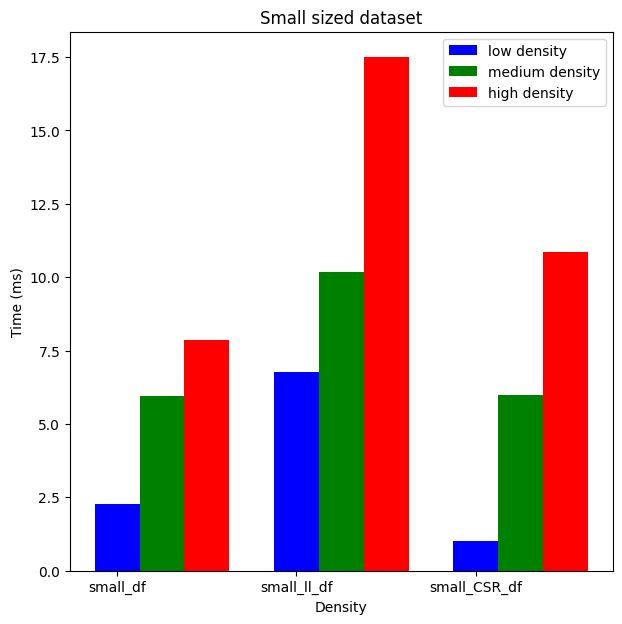

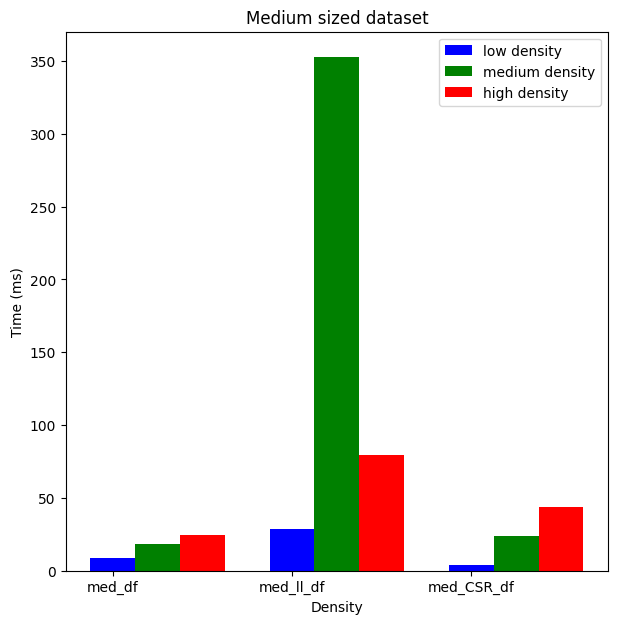

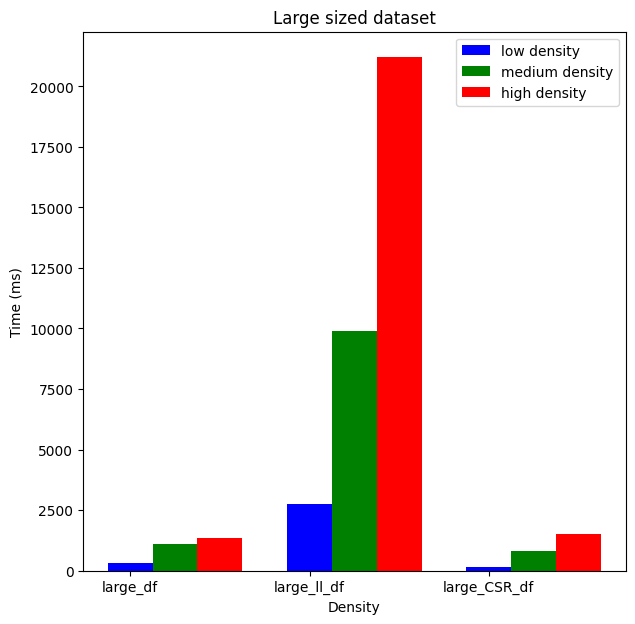

In [15]:
a = [small_df,small_ll_df,small_CSR_df],[med_df,med_ll_df,med_CSR_df],[large_df,large_ll_df,large_CSR_df]
data = []
array_names = ["small_df","small_ll_df","small_CSR_df"],["med_df","med_ll_df","med_CSR_df"],["large_df","large_ll_df","large_CSR_df"]
title = ["Small sized dataset","Medium sized dataset", "Large sized dataset"]
names = []
for array in range(len(a)):
    temp_data = [[],[],[]]
    temp_names = [[],[],[]]
    for df in a[array]:
        for i,col in enumerate(df):
            temp_names[i].append(col)
            temp_data[i].append(df[col].sum())
    data.append(temp_data)
    names.append(temp_names)

display(names,data)
for i in range(len(data)):
    X = np.arange(3)
    fig = plt.figure(figsize=(7,7))
    plt.title(title[i])
    plt.xlabel("Density")
    plt.ylabel("Time (ms)")
    # plt.xticks(array_names[i],)
    plt.bar(X + 0.00, data[i][0], color = 'b', width = 0.25, label = "low density")
    plt.bar(X + 0.25, data[i][1], color = 'g', width = 0.25, label = "medium density")
    plt.bar(X + 0.50, data[i][2], color = 'r', width = 0.25, label = "high density")
    plt.xticks(X,array_names[i])
    plt.legend()
plt.show()
        